In [ ]:
# 1-bit half-adder using Qiskit + AerSimulator
# q0 = a, q1 = b, q2 = SUM (a XOR b), q3 = CARRY (a AND b)

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Get inputs and validate
a = int(input("Enter first bit (0 or 1): ").strip())
b = int(input("Enter second bit (0 or 1): ").strip())
if a not in (0,1) or b not in (0,1):
    raise ValueError("Both inputs must be 0 or 1.")

# Create circuit: 4 qubits, 2 classical bits
qc = QuantumCircuit(4, 2)

# initialize inputs
if a == 1:
    qc.x(0)   # set q0 = a
if b == 1:
    qc.x(1)   # set q1 = b

# SUM = a XOR b -> q2
qc.cx(0, 2)
qc.cx(1, 2)

# CARRY = a AND b -> q3 (Toffoli/CCX)
qc.ccx(0, 1, 3)

# Measure: q2 -> c0 (SUM), q3 -> c1 (CARRY)
qc.measure(2, 0)  # SUM -> classical bit 0
qc.measure(3, 1)  # CARRY -> classical bit 1

# Run on AerSimulator
sim = AerSimulator()
t_qc = transpile(qc, sim)
job = sim.run(t_qc, shots=1024)
result = job.result()
counts = result.get_counts()

print("Circuit (text):")
print(qc.draw(output='text'))
print("\nCounts (keys are 'c1c0' -> 'CARRY SUM'):", counts)
print("Interpretation example: '01' means CARRY=0, SUM=1")


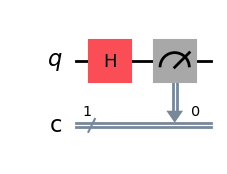

In [1]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(1,1)
qc.h(0) # applying H gate to |0>
qc.measure(0,0) # measuring qubit 0 into classical bit 0
qc.draw('mpl') #can use text instead of mpl too

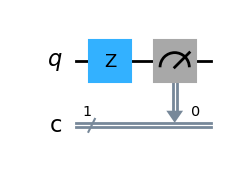

In [2]:
qc = QuantumCircuit(1,1)
qc.z(0) # applying Pauli's Z gate to |0>
# replace z with x, y, s, t, h, etc. to see the effect of other gates
qc.measure(0,0) # measuring qubit 0 into classical bit 0
qc.draw('mpl') #can use text instead of mpl too

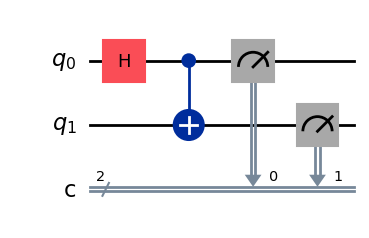

In [8]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1]) # the value of qubit 0 is saved into classical bit 0 and qubit 1 into classical bit 1
qc.draw('mpl')